In [2]:
import open3d as o3d
import numpy as np
from PIL import Image

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [13]:
number = 5
mask = np.load(f'dl_challenge/{number:03d}/mask.npy')
pc = np.load(f'dl_challenge/{number:03d}/pc.npy')
img_rgb = Image.open(f'dl_challenge/{number:03d}/rgb.jpg')
img_np = np.array(img_rgb)

In [14]:
print(f'pc shape: {pc.shape}')
print(f'mask shape: {mask.shape}')
print(f'img_rgb       shape: {img_np.shape}')

pc shape: (3, 436, 596)
mask shape: (4, 436, 596)
img_rgb       shape: (436, 596, 3)


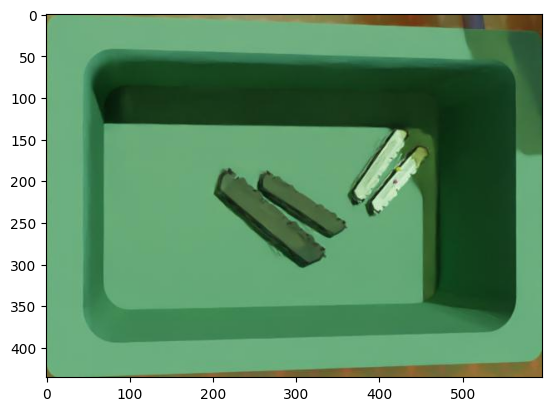

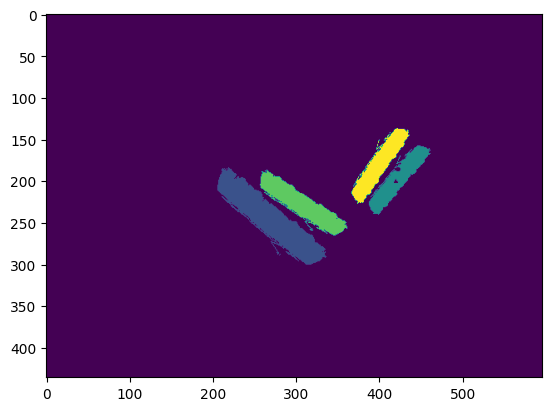

single_mask shape: (436, 596)
image shape: (436, 596, 3)
unqiue numbers in mask: [0 1 2 3 4]


In [15]:
# show image and mask
import matplotlib.pyplot as plt
img_np = np.array(img_rgb)
plt.imshow(img_rgb)
plt.show()
# mask shape is (20, 573, 788), where 20 is 20 channels of ture or false, need to convert to single channel
# if mask   [1] is true, then new mask is 1, otherwise 0
# add mask of all false at first
mask = np.concatenate([np.zeros_like(mask[0:1]), mask], axis=0)
single_mask = np.argmax(mask, axis=0)
plt.imshow(single_mask)
plt.show()
print(f'single_mask shape: {single_mask.shape}')
print(f'image shape: {img_np.shape}')
print(f'unqiue numbers in mask: {np.unique(single_mask)}')

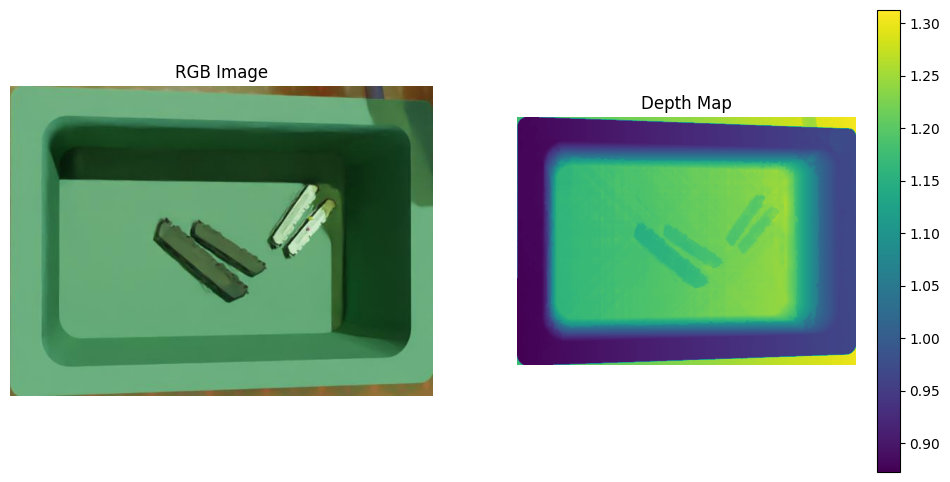

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
depth_map = pc[2]
# Plot the RGB image
axs[0].imshow(img_np)
axs[0].set_title('RGB Image')
axs[0].axis('off')

# Plot the depth map
im = axs[1].imshow(depth_map, cmap='viridis')
axs[1].set_title('Depth Map')
axs[1].axis('off')

# Add a color bar for the depth map
fig.colorbar(im, ax=axs[1])

plt.show()




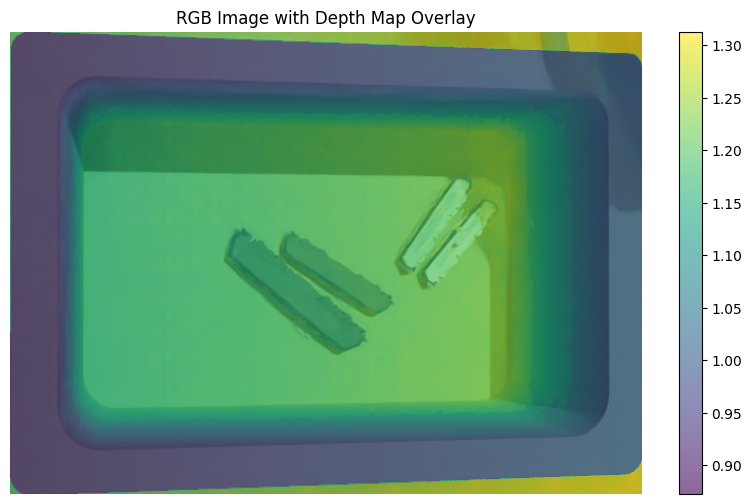

In [17]:
# Extract the depth map
depth_map = pc[2]

# Create the figure and axes
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the RGB image
ax.imshow(img_np)
ax.set_title('RGB Image with Depth Map Overlay')
ax.axis('off')

# Overlay the depth map on the RGB image with some transparency
depth_map_overlay = ax.imshow(depth_map, cmap='viridis', alpha=0.6)  # Adjust alpha as needed

# Add a color bar for the depth map
fig.colorbar(depth_map_overlay, ax=ax, fraction=0.046, pad=0.04)

# Show the plot
plt.show()

In [18]:
print(f'unqiue numbers in mask {np.unique(mask)}')
print(f' mask shape: {mask.shape}') 

unqiue numbers in mask [False  True]
 mask shape: (5, 436, 596)


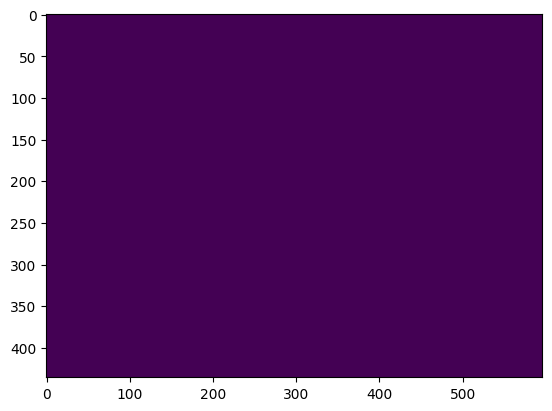

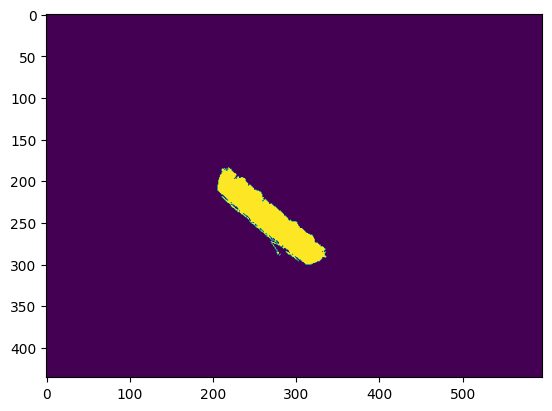

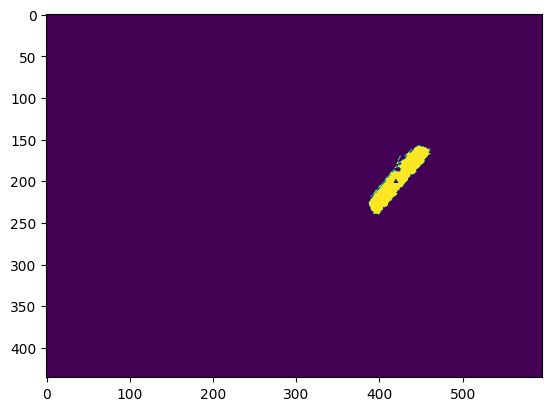

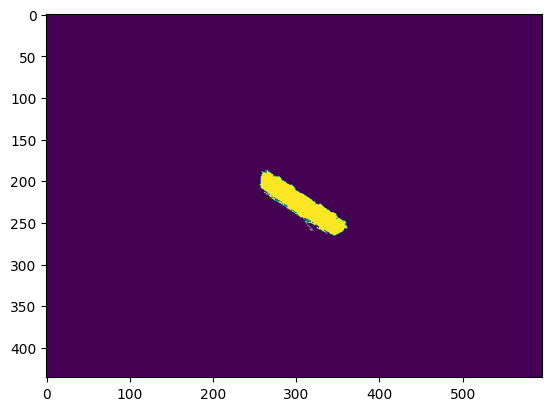

In [19]:

for i in range(4):
    plt.imshow(mask[i])
    plt.show()

In [1]:
import model
import torch

In [9]:
my_model = model.model_init()
my_model.load_state_dict(torch.load('model.pth'))

<All keys matched successfully>

In [10]:
import dataset
transfroms = dataset.get_transform(False)
my_dataset = dataset.ChallengeDataset('mini_set/',transfroms, True)

In [11]:
# get the first item
sample = my_dataset[0]
print(sample[0].shape)

current_path: 000
torch.Size([4, 384, 512])


In [12]:
image = sample[0].unsqueeze(0)
print(image.shape)

torch.Size([1, 4, 384, 512])


In [13]:
my_model.eval()
with torch.no_grad():
    output = my_model(image)
    # print(output.shape)

In [14]:
output[0]['masks'].shape
masks = (output[0]["masks"] > 0.7).squeeze(1)


torch.Size([100, 1, 384, 512])
torch.Size([100, 384, 512])


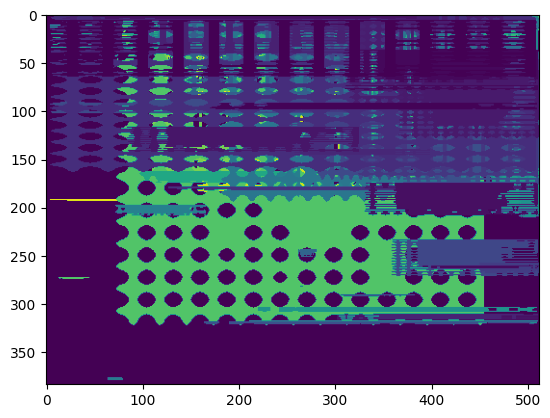

In [15]:
import numpy as np
import matplotlib.pyplot as plt
print(output[0]['masks'].shape)

print(masks.shape)
# plt imshow massk
masks_argmax_np = masks.cpu().numpy().astype(np.uint8)
masks_argmax_np = np.argmax(masks_argmax_np, axis=0)
plt.imshow(masks_argmax_np)


In [16]:
# to np
output_np = output[0]['masks'].cpu().numpy()
output_np = np.transpose(output_np, (1,0,2,3))
print(output_np.shape)

(1, 100, 384, 512)


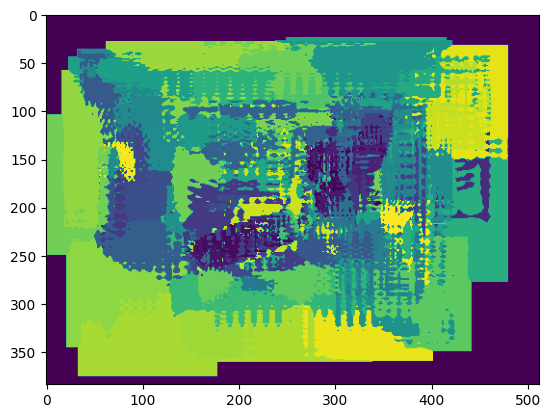

In [67]:
# argmax and plt
import matplotlib.pyplot as plt
import numpy as np
output_np = np.argmax(output_np[0], axis=0)
plt.imshow(output_np)